In [1]:
!pip install git+https://github.com/ChaoningZhang/MobileSAM.git
!pip install timm gdown
!gdown 1dE-YAG-1mFCBmao2rHDp0n-PP4eH7SjE
!unzip -q weight.zip
!rm weight.zip

  Cloning https://github.com/ChaoningZhang/MobileSAM.git to /tmp/pip-req-build-wlihive4
  Running command git clone --filter=blob:none --quiet https://github.com/ChaoningZhang/MobileSAM.git /tmp/pip-req-build-wlihive4
  Resolved https://github.com/ChaoningZhang/MobileSAM.git to commit c12dd83cbe26dffdcc6a0f9e7be2f6fb024df0ed
  Preparing metadata (setup.py) ... done
  Created wheel for mobile_sam: filename=mobile_sam-1.0-py3-none-any.whl size=42434 sha256=a9547c4908cf9edc0266a39296d8a26b26fc5a1ca8015a38abc6ab049a9d3757
  Stored in directory: /tmp/pip-ephem-wheel-cache-eph6gcxo/wheels/43/b1/9d/1c1b33c31d4c54f0a502f9c48b655f87213ab01e55d09cf4ef
Successfully built mobile_sam
Downloading...
From (original): https://drive.google.com/uc?id=1dE-YAG-1mFCBmao2rHDp0n-PP4eH7SjE
From (redirected): https://drive.google.com/uc?id=1dE-YAG-1mFCBmao2rHDp0n-PP4eH7SjE&confirm=t&uuid=5e9d8cab-f24b-402a-9a8c-68fe45d2193e
To: /kaggle/working/weight.zip
100%|██████████████████████████████████████| 2.76G/2.76G

In [2]:
from mobile_sam import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor
import torch

model_type = "vit_t"
sam_checkpoint = "./weight/mobile_sam.pt"

device = "cuda" if torch.cuda.is_available() else "cpu"

mobile_sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
mobile_sam.to(device=device)
mobile_sam.eval()

# predictor = SamPredictor(mobile_sam)
# predictor.set_image(<your_image>)
# masks, _, _ = predictor.predict(<input_prompts>)
mask_generator = SamAutomaticMaskGenerator(mobile_sam)

/opt/conda/lib/python3.10/site-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_5m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_5m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/opt/conda/lib/python3.10/site-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_11m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_11m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_model(fn_wrapper)
/opt/conda/lib/python3.10/site-packages/mobile_sam/modeling/tiny_vit_sam.py:656: UserWarning: Overwriting tiny_vit_21m_224 in registry with mobile_sam.modeling.tiny_vit_sam.tiny_vit_21m_224. This is because the name being registered conflicts with an existing name. Please check if this is not expected.
  return register_

In [3]:
from PIL import Image, ImageOps
import requests
from time import perf_counter
import numpy as np
import cv2

url = "https://github.com/Isalia20/DETR-finetune/blob/main/IMG_3507.jpg?raw=true"
image = Image.open(requests.get(url, stream=True).raw)
image = ImageOps.exif_transpose(image)

image = np.array(image)
masks = mask_generator.generate(image)

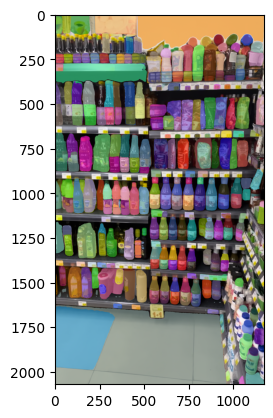

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import random

def get_pred_image(image,masks):
    pred_image = image.copy()
    
    for mask in masks:
        # color = [34,123,45]
        color = (np.random.rand(3))*255
        thickness = 10
        # pred_image = cv2.rectangle(pred_image,(mask["bbox"][0],mask["bbox"][1]),(mask["bbox"][0]+mask["bbox"][2], mask["bbox"][1]+mask["bbox"][3]),color,thickness)
        pred_image[mask["segmentation"]] = color

    return cv2.addWeighted(image, 0.4, pred_image, 0.6, 0)


plt.figure()
plt.imshow(get_pred_image(image,masks))
plt.show()

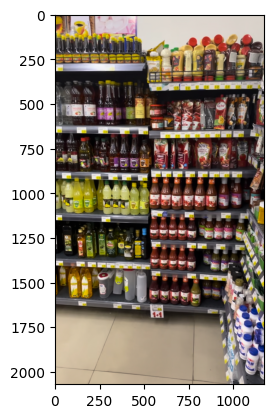

In [5]:
plt.imshow(image)

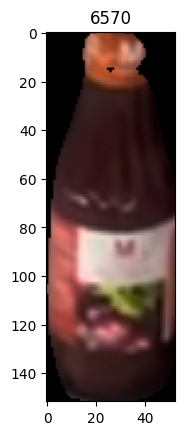

In [6]:
def get_cutouts(image,masks):
    cutouts = []
    areas = []
    for mask in masks:
        try:
            x,y,w,h = mask["bbox"]
            xmax,ymax = x+w , y+h
            image_cutout = image[y:ymax,x:xmax].copy()
            mask_cutout  = mask["segmentation"][y:ymax,x:xmax]
            image_cutout[~mask_cutout] = 0
            cutouts.append(image_cutout)
            areas.append(mask["area"])
        except Exception as e:
            print('error see xyxy:\t',x,y,xmax,ymax)
    return cutouts,areas

plt.figure()
cutouts,areas = get_cutouts(image,masks)
idx = 66
cutout = cutouts[idx]
area = areas[idx]
plt.imshow(cutout)
plt.title(area)
plt.show()

In [7]:
import gdown
gdown.download_folder("https://drive.google.com/drive/u/1/folders/1W9Ezz-arQxwhp2fYFRQ6AaJlwknEpbsL", quiet=False)

Retrieving folder contents


Processing file 1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ IMG_0453.MOV
Processing file 1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW IMG_0475.MOV
Processing file 1jMPV0xHroctZ_gFlrPfMcn_0JmzNS9Lz IMG_0486.JPG
Processing file 1Xe8RDsdGaaQye81yJH2ZNkNBLSd9Le7c IMG_0488.JPG
Processing file 1Oae86uTuXxfrMfXIGNHKyY6QKSfClWlg IMG_0491.mov
Processing file 16wC8h6t9Q3Nb90_cWL8OkgtOHjfXMYDO IMG_0491.mov
Processing file 1NlMr0ejuGJqrHPwC2VWooWx7aoXMM6f- IMG_0492.MOV
Processing file 1w0tK3w6FZy3HDqhwY1Ukpadsvk-I0fgi IMG_0493.MOV
Processing file 19gbspyjfbDmOQ1wp8CcV2CVFrTWn_kyN IMG_0493.MOV
Processing file 1r9GwhWjTFwIoeDWpTu2L9sZ0j0lMvWFW IMG_0570.MOV
Processing file 1MDEvRiNGuqwKUrs9svBEWGVtp_Sim6aH IMG_0571.MOV


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ
From (redirected): https://drive.google.com/uc?id=1vrHN7z6x7AbwXe9APFkoh9X-g2h0DtHQ&confirm=t&uuid=b507078a-ab57-4fa9-bcf5-0ad53e74c843
To: /kaggle/working/KiranaVideo/IMG_0453.MOV
100%|██████████| 329M/329M [00:01<00:00, 220MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW
From (redirected): https://drive.google.com/uc?id=1Y87AmDkks3icYpZ7UdisTfjUZ9tMSbkW&confirm=t&uuid=80119026-ec43-4423-b940-9cb947a237e6
To: /kaggle/working/KiranaVideo/IMG_0475.MOV
100%|██████████| 443M/443M [00:01<00:00, 224MB/s]
Downloading...
From: https://drive.google.com/uc?id=1jMPV0xHroctZ_gFlrPfMcn_0JmzNS9Lz
To: /kaggle/working/KiranaVideo/IMG_0486.JPG
100%|██████████| 5.22M/5.22M [00:00<00:00, 235MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Xe8

['/kaggle/working/KiranaVideo/IMG_0453.MOV',
 '/kaggle/working/KiranaVideo/IMG_0475.MOV',
 '/kaggle/working/KiranaVideo/IMG_0486.JPG',
 '/kaggle/working/KiranaVideo/IMG_0488.JPG',
 '/kaggle/working/KiranaVideo/IMG_0491.mov',
 '/kaggle/working/KiranaVideo/IMG_0491.mov',
 '/kaggle/working/KiranaVideo/IMG_0492.MOV',
 '/kaggle/working/KiranaVideo/IMG_0493.MOV',
 '/kaggle/working/KiranaVideo/IMG_0493.MOV',
 '/kaggle/working/KiranaVideo/IMG_0570.MOV',
 '/kaggle/working/KiranaVideo/IMG_0571.MOV']

In [8]:
!ls KiranaVideo

IMG_0453.MOV  IMG_0486.JPG  IMG_0491.mov  IMG_0493.MOV	IMG_0571.MOV
IMG_0475.MOV  IMG_0488.JPG  IMG_0492.MOV  IMG_0570.MOV


In [9]:
from glob import glob
from pathlib import Path

video_formats = [".mov",".mp4",".mkv"]
image_formats = [".jpg",".png",".jpeg",".webp"]


base_dir = "KiranaVideo"
all_list = glob(f"{base_dir}/*")
video_list = list(filter(lambda x: Path(x).suffix.lower() in video_formats, all_list))
image_list = list(filter(lambda x: Path(x).suffix.lower() in image_formats, all_list))

video_list,image_list

(['KiranaVideo/IMG_0493.MOV',
  'KiranaVideo/IMG_0491.mov',
  'KiranaVideo/IMG_0475.MOV',
  'KiranaVideo/IMG_0570.MOV',
  'KiranaVideo/IMG_0453.MOV',
  'KiranaVideo/IMG_0571.MOV',
  'KiranaVideo/IMG_0492.MOV'],
 ['KiranaVideo/IMG_0488.JPG', 'KiranaVideo/IMG_0486.JPG'])

In [10]:
import cv2
import os,shutil
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm


frames_dir = Path("frames/")

def get_frames(video_paths,frame_interval=10):
    
    if isinstance(video_paths,str): video_paths = [video_paths]
        
    if os.path.exists(frames_dir): shutil.rmtree(frames_dir)
    os.makedirs(frames_dir)    
    
    
    for video_path in video_paths:
        
        
        video_obj = cv2.VideoCapture(video_path)
        total_frames = int(video_obj.get(cv2.CAP_PROP_FRAME_COUNT))
        video_path = Path(video_path)
        
        print(f"Video Name: {video_path}")
        print(f"Total frames in the video: {total_frames}")
        print(f"Extracting every {frame_interval}th frame...")

        for i in tqdm(range(total_frames)):
            
            ret, frame = video_obj.read()
            
            # If frame read is unsuccessful, break the loop
            if not ret:
                print("frame unsuccessful")
                break
            
            if (i+1) % frame_interval == 0:
                img_name = Path(f"{video_path.stem}_frame_{i+1}.jpg")
                img_path = str(frames_dir / img_name)

#                 print(img_path)
                cv2.imwrite(img_path, frame)
                
        video_obj.release()

    
get_frames(video_list, frame_interval=10)

Video Name: KiranaVideo/IMG_0493.MOV
Total frames in the video: -9223372036854775808
Extracting every 10th frame...


0it [00:00, ?it/s]


Video Name: KiranaVideo/IMG_0491.mov
Total frames in the video: 563
Extracting every 10th frame...


100%|██████████| 563/563 [00:25<00:00, 22.30it/s]


Video Name: KiranaVideo/IMG_0475.MOV
Total frames in the video: 6824
Extracting every 10th frame...


100%|██████████| 6824/6824 [01:21<00:00, 83.42it/s]


Video Name: KiranaVideo/IMG_0570.MOV
Total frames in the video: 2563
Extracting every 10th frame...


100%|██████████| 2563/2563 [00:30<00:00, 84.92it/s]


Video Name: KiranaVideo/IMG_0453.MOV
Total frames in the video: 5074
Extracting every 10th frame...


100%|██████████| 5074/5074 [00:58<00:00, 86.30it/s]


Video Name: KiranaVideo/IMG_0571.MOV
Total frames in the video: 5670
Extracting every 10th frame...


100%|██████████| 5670/5670 [01:07<00:00, 83.94it/s]


Video Name: KiranaVideo/IMG_0492.MOV
Total frames in the video: -9223372036854775808
Extracting every 10th frame...


0it [00:00, ?it/s]


In [11]:
print("total number of frames:",len(os.listdir(frames_dir)))

total number of frames: 2068


In [12]:
# import shutil
for path in tqdm(image_list):
    shutil.copy(path,frames_dir / Path(path).name)

100%|██████████| 2/2 [00:00<00:00, 219.09it/s]


In [13]:
print("total number of frames:",len(os.listdir(frames_dir)))

total number of frames: 2070


In [14]:
import cv2,shutil,os
from glob import glob
from pathlib import Path
from tqdm import tqdm

crops_dir = Path("crops/")
detections_dir = Path("detections/")

def create_crops(image_paths):

    if os.path.exists(crops_dir): shutil.rmtree(crops_dir)
    os.makedirs(crops_dir)
    
    if os.path.exists(detections_dir): shutil.rmtree(detections_dir)
    os.makedirs(detections_dir)

    for image_path in tqdm(image_paths):

        image_path = Path(image_path)
#         image = Image.open(image_path).convert("RGB")
#         image_array=np.array(image)
        image = cv2.imread(str(image_path))[:,:,::-1]
        
        # prediction using mobile_sam
        masks = mask_generator.generate(image)
        cutouts,areas = get_cutouts(image,masks)
        
    
        for i,cutout in enumerate(cutouts):
            cutout = cutout.astype("uint8")
            filename = crops_dir / Path(f"{image_path.stem}__crop_{i}{image_path.suffix}")
            filename = str(filename)
            # print(filename)
            cv2.imwrite(filename,cutout[:,:,::-1])
            
        # save detections too
        cv2.imwrite(str(detections_dir / Path(image_path.name)),get_pred_image(image,masks)[:,:,::-1])

In [15]:
create_crops(glob(str(frames_dir)+"/*")[:2])

100%|██████████| 2/2 [00:11<00:00,  5.82s/it]


In [16]:
create_crops(glob(str(frames_dir)+"/*"))

  1%|          | 18/2070 [01:58<3:40:03,  6.43s/it]

error see xyxy:	 811.0 796.0 1076.0 1047.0
error see xyxy:	 892.0 1073.0 1024.0 1146.0
error see xyxy:	 723.0 1076.0 1022.0 1149.0
error see xyxy:	 723.0 1079.0 853.0 1149.0
error see xyxy:	 408.0 257.0 495.0 347.0
error see xyxy:	 0.0 849.0 111.0 1078.0
error see xyxy:	 396.0 1084.0 525.0 1155.0
error see xyxy:	 719.0 246.0 807.0 339.0
error see xyxy:	 525.0 809.0 783.0 1052.0
error see xyxy:	 258.0 1652.0 386.0 1714.0
error see xyxy:	 96.0 861.0 251.0 1081.0
error see xyxy:	 13.0 1170.0 304.0 1303.0
error see xyxy:	 0.0 692.0 1079.0 823.0
error see xyxy:	 299.0 1161.0 471.0 1287.0
error see xyxy:	 498.0 1651.0 563.0 1710.0
error see xyxy:	 611.0 934.0 720.0 996.0
error see xyxy:	 796.0 393.0 912.0 505.0
error see xyxy:	 912.0 833.0 984.0 883.0
error see xyxy:	 99.0 1821.0 1078.0 1919.0
error see xyxy:	 13.0 1177.0 140.0 1303.0
error see xyxy:	 0.0 216.0 1079.0 360.0
error see xyxy:	 535.0 846.0 636.0 1037.0
error see xyxy:	 0.0 779.0 398.0 825.0
error see xyxy:	 25.0 1431.0 145.0 150

  6%|▌         | 117/2070 [11:19<2:57:00,  5.44s/it]

error see xyxy:	 395.0 1545.0 529.0 1693.0
error see xyxy:	 649.0 1534.0 786.0 1671.0
error see xyxy:	 268.0 1545.0 529.0 1694.0
error see xyxy:	 0.0 1753.0 76.0 1900.0
error see xyxy:	 649.0 1716.0 807.0 1810.0
error see xyxy:	 529.0 1541.0 650.0 1680.0
error see xyxy:	 645.0 1302.0 842.0 1488.0
error see xyxy:	 374.0 1726.0 548.0 1866.0
error see xyxy:	 439.0 1306.0 650.0 1506.0
error see xyxy:	 694.0 734.0 907.0 986.0
error see xyxy:	 1003.0 1871.0 1079.0 1919.0
error see xyxy:	 447.0 1051.0 652.0 1254.0
error see xyxy:	 267.0 1551.0 407.0 1685.0
error see xyxy:	 442.0 797.0 703.0 988.0
error see xyxy:	 529.0 1540.0 769.0 1680.0
error see xyxy:	 0.0 1053.0 65.0 1265.0
error see xyxy:	 218.0 488.0 549.0 519.0
error see xyxy:	 74.0 1753.0 139.0 1894.0
error see xyxy:	 247.0 1051.0 450.0 1258.0
error see xyxy:	 285.0 1735.0 388.0 1837.0
error see xyxy:	 247.0 1246.0 878.0 1316.0
error see xyxy:	 0.0 1513.0 61.0 1560.0
error see xyxy:	 0.0 0.0 1079.0 142.0
error see xyxy:	 354.0 12.0 56

 13%|█▎        | 273/2070 [25:35<3:19:18,  6.65s/it]

error see xyxy:	 794.0 1090.0 1017.0 1531.0
error see xyxy:	 572.0 1025.0 763.0 1145.0
error see xyxy:	 829.0 1322.0 986.0 1484.0
error see xyxy:	 833.0 640.0 993.0 1034.0
error see xyxy:	 0.0 1764.0 1079.0 1919.0
error see xyxy:	 722.0 1003.0 830.0 1096.0
error see xyxy:	 842.0 793.0 901.0 1009.0
error see xyxy:	 448.0 1385.0 541.0 1451.0
error see xyxy:	 985.0 1113.0 1051.0 1212.0
error see xyxy:	 842.0 793.0 947.0 1010.0
error see xyxy:	 956.0 960.0 1079.0 1096.0
error see xyxy:	 0.0 301.0 108.0 1468.0
error see xyxy:	 445.0 763.0 622.0 881.0
error see xyxy:	 568.0 963.0 692.0 1037.0
error see xyxy:	 541.0 1032.0 581.0 1066.0
error see xyxy:	 565.0 1355.0 670.0 1574.0
error see xyxy:	 575.0 831.0 642.0 908.0
error see xyxy:	 469.0 1443.0 555.0 1543.0
error see xyxy:	 366.0 785.0 426.0 879.0
error see xyxy:	 814.0 190.0 959.0 373.0
error see xyxy:	 577.0 1436.0 637.0 1509.0
error see xyxy:	 629.0 641.0 744.0 701.0
error see xyxy:	 713.0 783.0 747.0 880.0
error see xyxy:	 448.0 1308.0

 14%|█▎        | 280/2070 [26:13<2:49:15,  5.67s/it]

error see xyxy:	 735.0 402.0 1079.0 552.0
error see xyxy:	 618.0 1037.0 1079.0 1175.0
error see xyxy:	 61.0 0.0 281.0 97.0
error see xyxy:	 813.0 0.0 1079.0 62.0
error see xyxy:	 975.0 292.0 1079.0 352.0
error see xyxy:	 0.0 1678.0 44.0 1919.0
error see xyxy:	 68.0 699.0 346.0 1117.0
error see xyxy:	 210.0 1536.0 419.0 1919.0
error see xyxy:	 984.0 1215.0 1079.0 1440.0
error see xyxy:	 566.0 1847.0 678.0 1919.0
error see xyxy:	 754.0 944.0 980.0 1050.0
error see xyxy:	 45.0 659.0 237.0 700.0
error see xyxy:	 420.0 1761.0 484.0 1797.0
error see xyxy:	 211.0 1180.0 343.0 1497.0
error see xyxy:	 858.0 1844.0 967.0 1914.0
error see xyxy:	 34.0 1204.0 132.0 1249.0
error see xyxy:	 949.0 653.0 1079.0 716.0
error see xyxy:	 759.0 758.0 1023.0 1007.0
error see xyxy:	 541.0 908.0 619.0 1081.0
error see xyxy:	 977.0 1852.0 1079.0 1919.0
error see xyxy:	 978.0 1433.0 1079.0 1525.0
error see xyxy:	 734.0 0.0 1079.0 550.0
error see xyxy:	 257.0 1484.0 330.0 1557.0
error see xyxy:	 0.0 0.0 1079.0 19

 15%|█▌        | 311/2070 [28:51<2:30:22,  5.13s/it]

error see xyxy:	 0.0 1679.0 1077.0 1919.0
error see xyxy:	 653.0 1035.0 765.0 1209.0
error see xyxy:	 239.0 1209.0 394.0 1378.0
error see xyxy:	 773.0 464.0 939.0 633.0
error see xyxy:	 926.0 531.0 1079.0 689.0
error see xyxy:	 665.0 879.0 808.0 1033.0
error see xyxy:	 939.0 1079.0 1079.0 1244.0
error see xyxy:	 660.0 713.0 797.0 842.0
error see xyxy:	 276.0 1127.0 378.0 1196.0
error see xyxy:	 154.0 848.0 362.0 1002.0
error see xyxy:	 0.0 0.0 1079.0 135.0
error see xyxy:	 744.0 1061.0 864.0 1200.0
error see xyxy:	 796.0 683.0 1056.0 857.0
error see xyxy:	 781.0 846.0 960.0 957.0
error see xyxy:	 438.0 1276.0 594.0 1442.0
error see xyxy:	 110.0 684.0 219.0 785.0
error see xyxy:	 89.0 527.0 231.0 656.0
error see xyxy:	 413.0 863.0 497.0 999.0
error see xyxy:	 0.0 1290.0 388.0 1448.0
error see xyxy:	 396.0 489.0 493.0 597.0
error see xyxy:	 0.0 1596.0 1079.0 1684.0
error see xyxy:	 356.0 121.0 419.0 385.0
error see xyxy:	 198.0 397.0 341.0 533.0
error see xyxy:	 658.0 1195.0 813.0 1374.0

 18%|█▊        | 379/2070 [35:06<2:25:04,  5.15s/it]

error see xyxy:	 112.0 654.0 269.0 890.0
error see xyxy:	 264.0 674.0 371.0 899.0
error see xyxy:	 348.0 1599.0 500.0 1842.0
error see xyxy:	 803.0 80.0 1079.0 1919.0
error see xyxy:	 422.0 317.0 694.0 578.0
error see xyxy:	 499.0 690.0 635.0 910.0
error see xyxy:	 362.0 646.0 511.0 906.0
error see xyxy:	 11.0 460.0 149.0 556.0
error see xyxy:	 186.0 1256.0 242.0 1426.0
error see xyxy:	 0.0 275.0 66.0 474.0
error see xyxy:	 776.0 332.0 847.0 578.0
error see xyxy:	 645.0 855.0 818.0 925.0
error see xyxy:	 709.0 329.0 782.0 578.0
error see xyxy:	 636.0 327.0 705.0 576.0
error see xyxy:	 149.0 466.0 281.0 561.0
error see xyxy:	 48.0 171.0 190.0 254.0
error see xyxy:	 147.0 892.0 235.0 944.0
error see xyxy:	 698.0 860.0 818.0 925.0
error see xyxy:	 575.0 317.0 637.0 575.0
error see xyxy:	 153.0 1653.0 270.0 1819.0
error see xyxy:	 709.0 330.0 822.0 578.0
error see xyxy:	 637.0 789.0 809.0 860.0
error see xyxy:	 371.0 707.0 497.0 905.0
error see xyxy:	 369.0 1271.0 426.0 1449.0
error see xy

 20%|█▉        | 406/2070 [37:36<2:24:17,  5.20s/it]

error see xyxy:	 949.0 431.0 1079.0 600.0
error see xyxy:	 463.0 1169.0 613.0 1338.0
error see xyxy:	 0.0 1868.0 151.0 1919.0
error see xyxy:	 999.0 810.0 1079.0 887.0
error see xyxy:	 657.0 1236.0 809.0 1399.0
error see xyxy:	 0.0 1520.0 1079.0 1867.0
error see xyxy:	 500.0 1086.0 598.0 1153.0
error see xyxy:	 393.0 570.0 450.0 803.0
error see xyxy:	 873.0 843.0 992.0 995.0
error see xyxy:	 0.0 0.0 1079.0 103.0
error see xyxy:	 0.0 0.0 1077.0 72.0
error see xyxy:	 937.0 1027.0 1055.0 1163.0
error see xyxy:	 589.0 456.0 682.0 565.0
error see xyxy:	 0.0 0.0 1078.0 38.0
error see xyxy:	 361.0 811.0 561.0 966.0
error see xyxy:	 883.0 1158.0 1014.0 1332.0
error see xyxy:	 875.0 993.0 959.0 1173.0
error see xyxy:	 617.0 830.0 700.0 962.0
error see xyxy:	 872.0 1867.0 1012.0 1919.0
error see xyxy:	 140.0 703.0 263.0 809.0
error see xyxy:	 979.0 595.0 1079.0 656.0
error see xyxy:	 0.0 1312.0 82.0 1448.0
error see xyxy:	 690.0 680.0 809.0 960.0
error see xyxy:	 1025.0 1867.0 1079.0 1919.0
erro

 21%|██▏       | 440/2070 [40:53<2:31:25,  5.57s/it]

error see xyxy:	 37.0 368.0 160.0 500.0
error see xyxy:	 522.0 347.0 647.0 481.0
error see xyxy:	 224.0 1803.0 313.0 1896.0
error see xyxy:	 75.0 1177.0 191.0 1290.0
error see xyxy:	 496.0 1806.0 596.0 1903.0
error see xyxy:	 773.0 463.0 1025.0 613.0
error see xyxy:	 512.0 474.0 764.0 615.0
error see xyxy:	 942.0 321.0 1077.0 458.0
error see xyxy:	 480.0 596.0 785.0 826.0
error see xyxy:	 559.0 1570.0 717.0 1632.0
error see xyxy:	 602.0 1181.0 710.0 1292.0
error see xyxy:	 0.0 1360.0 82.0 1643.0
error see xyxy:	 0.0 1641.0 119.0 1808.0
error see xyxy:	 175.0 1420.0 334.0 1587.0
error see xyxy:	 559.0 1444.0 717.0 1632.0
error see xyxy:	 51.0 1293.0 168.0 1622.0
error see xyxy:	 67.0 705.0 193.0 843.0
error see xyxy:	 0.0 755.0 142.0 900.0
error see xyxy:	 115.0 1758.0 1079.0 1919.0
error see xyxy:	 166.0 694.0 476.0 784.0
error see xyxy:	 793.0 615.0 1062.0 788.0
error see xyxy:	 403.0 490.0 502.0 599.0
error see xyxy:	 175.0 1506.0 330.0 1587.0
error see xyxy:	 0.0 503.0 166.0 721.0
e

 22%|██▏       | 456/2070 [42:19<2:28:08,  5.51s/it]

error see xyxy:	 972.0 1795.0 1079.0 1919.0
error see xyxy:	 319.0 1634.0 504.0 1796.0
error see xyxy:	 611.0 1423.0 755.0 1576.0
error see xyxy:	 342.0 1434.0 485.0 1596.0
error see xyxy:	 612.0 1622.0 777.0 1737.0
error see xyxy:	 206.0 1439.0 355.0 1590.0
error see xyxy:	 487.0 1428.0 615.0 1586.0
error see xyxy:	 487.0 1427.0 740.0 1586.0
error see xyxy:	 227.0 1835.0 813.0 1919.0
error see xyxy:	 225.0 1642.0 338.0 1765.0
error see xyxy:	 392.0 1169.0 615.0 1390.0
error see xyxy:	 612.0 1165.0 837.0 1374.0
error see xyxy:	 486.0 1629.0 619.0 1680.0
error see xyxy:	 0.0 1873.0 69.0 1919.0
error see xyxy:	 502.0 1760.0 532.0 1794.0
error see xyxy:	 0.0 1590.0 54.0 1829.0
error see xyxy:	 147.0 287.0 385.0 525.0
error see xyxy:	 667.0 607.0 881.0 816.0
error see xyxy:	 224.0 1680.0 817.0 1919.0
error see xyxy:	 610.0 883.0 852.0 1111.0
error see xyxy:	 729.0 612.0 854.0 683.0
error see xyxy:	 409.0 1184.0 501.0 1237.0
error see xyxy:	 0.0 1590.0 39.0 1666.0
error see xyxy:	 189.0 630

 24%|██▍       | 495/2070 [45:49<2:30:17,  5.73s/it]

error see xyxy:	 0.0 944.0 720.0 1919.0
error see xyxy:	 676.0 1640.0 1077.0 1919.0
error see xyxy:	 685.0 327.0 1079.0 459.0
error see xyxy:	 723.0 842.0 1079.0 901.0
error see xyxy:	 704.0 1142.0 1079.0 1244.0
error see xyxy:	 692.0 1381.0 1079.0 1532.0
error see xyxy:	 439.0 398.0 590.0 523.0
error see xyxy:	 691.0 1297.0 1079.0 1485.0
error see xyxy:	 726.0 417.0 1079.0 578.0
error see xyxy:	 0.0 44.0 188.0 352.0
error see xyxy:	 695.0 1477.0 1079.0 1765.0
error see xyxy:	 732.0 0.0 1078.0 365.0
error see xyxy:	 0.0 284.0 188.0 447.0
error see xyxy:	 679.0 1477.0 1078.0 1919.0
error see xyxy:	 691.0 1200.0 1079.0 1486.0
error see xyxy:	 695.0 1596.0 1079.0 1771.0
error see xyxy:	 1026.0 673.0 1079.0 747.0
error see xyxy:	 368.0 231.0 539.0 433.0
error see xyxy:	 0.0 287.0 375.0 655.0
error see xyxy:	 0.0 946.0 313.0 1088.0
error see xyxy:	 203.0 896.0 283.0 943.0
error see xyxy:	 70.0 926.0 166.0 967.0
error see xyxy:	 686.0 326.0 1079.0 580.0
error see xyxy:	 372.0 505.0 443.0 555

 24%|██▍       | 497/2070 [45:58<2:17:18,  5.24s/it]

error see xyxy:	 0.0 1613.0 53.0 1783.0
error see xyxy:	 827.0 1211.0 982.0 1372.0
error see xyxy:	 27.0 77.0 105.0 164.0
error see xyxy:	 995.0 1827.0 1079.0 1919.0
error see xyxy:	 0.0 1832.0 257.0 1919.0
error see xyxy:	 633.0 1144.0 782.0 1312.0
error see xyxy:	 33.0 1247.0 267.0 1381.0
error see xyxy:	 517.0 796.0 708.0 946.0
error see xyxy:	 24.0 4.0 1079.0 78.0
error see xyxy:	 670.0 1062.0 766.0 1128.0
error see xyxy:	 777.0 806.0 862.0 938.0
error see xyxy:	 0.0 782.0 67.0 879.0
error see xyxy:	 246.0 1840.0 550.0 1919.0
error see xyxy:	 726.0 605.0 837.0 722.0
error see xyxy:	 835.0 387.0 971.0 673.0
error see xyxy:	 0.0 879.0 62.0 1097.0
error see xyxy:	 451.0 1063.0 560.0 1227.0
error see xyxy:	 0.0 784.0 66.0 1095.0
error see xyxy:	 0.0 1582.0 1078.0 1830.0
error see xyxy:	 442.0 567.0 497.0 797.0
error see xyxy:	 735.0 1138.0 817.0 1229.0
error see xyxy:	 302.0 686.0 424.0 786.0
error see xyxy:	 254.0 1228.0 770.0 1411.0
error see xyxy:	 466.0 1132.0 518.0 1217.0
error se

 25%|██▍       | 513/2070 [47:28<2:28:23,  5.72s/it]

error see xyxy:	 0.0 1752.0 323.0 1919.0
error see xyxy:	 104.0 1151.0 191.0 1303.0
error see xyxy:	 88.0 313.0 245.0 416.0
error see xyxy:	 76.0 1072.0 246.0 1167.0
error see xyxy:	 77.0 1073.0 242.0 1302.0
error see xyxy:	 0.0 1188.0 1077.0 1919.0
error see xyxy:	 776.0 735.0 1079.0 840.0
error see xyxy:	 147.0 945.0 230.0 1015.0
error see xyxy:	 0.0 0.0 1079.0 1919.0
error see xyxy:	 77.0 953.0 245.0 1302.0
error see xyxy:	 901.0 898.0 1075.0 1216.0
error see xyxy:	 232.0 525.0 376.0 648.0
error see xyxy:	 0.0 1528.0 757.0 1919.0
error see xyxy:	 555.0 1380.0 916.0 1555.0
error see xyxy:	 821.0 1286.0 924.0 1440.0
error see xyxy:	 863.0 512.0 956.0 610.0
error see xyxy:	 900.0 599.0 1079.0 642.0
error see xyxy:	 59.0 1350.0 136.0 1481.0
error see xyxy:	 524.0 318.0 679.0 413.0
error see xyxy:	 109.0 828.0 194.0 879.0
error see xyxy:	 876.0 678.0 939.0 735.0
error see xyxy:	 997.0 961.0 1079.0 1140.0
error see xyxy:	 1022.0 1136.0 1079.0 1197.0
error see xyxy:	 491.0 962.0 558.0 1030

 26%|██▌       | 543/2070 [50:03<2:14:13,  5.27s/it]

error see xyxy:	 0.0 1327.0 338.0 1500.0
error see xyxy:	 77.0 320.0 587.0 480.0
error see xyxy:	 0.0 1408.0 282.0 1499.0
error see xyxy:	 0.0 1683.0 1079.0 1919.0
error see xyxy:	 0.0 990.0 157.0 1124.0
error see xyxy:	 76.0 319.0 845.0 480.0
error see xyxy:	 352.0 796.0 575.0 1234.0
error see xyxy:	 0.0 1407.0 200.0 1500.0
error see xyxy:	 356.0 934.0 457.0 1069.0
error see xyxy:	 348.0 1105.0 530.0 1244.0
error see xyxy:	 509.0 1298.0 666.0 1434.0
error see xyxy:	 202.0 792.0 371.0 1065.0
error see xyxy:	 769.0 1190.0 923.0 1266.0
error see xyxy:	 659.0 480.0 694.0 530.0
error see xyxy:	 0.0 1868.0 316.0 1919.0
error see xyxy:	 502.0 1295.0 702.0 1564.0
error see xyxy:	 421.0 478.0 605.0 770.0
error see xyxy:	 161.0 1004.0 303.0 1201.0
error see xyxy:	 662.0 460.0 767.0 550.0
error see xyxy:	 192.0 386.0 289.0 458.0
error see xyxy:	 0.0 1224.0 91.0 1313.0
error see xyxy:	 0.0 1225.0 342.0 1500.0
error see xyxy:	 73.0 782.0 193.0 1007.0
error see xyxy:	 0.0 1070.0 139.0 1125.0
error 

 27%|██▋       | 551/2070 [50:41<2:05:12,  4.95s/it]

error see xyxy:	 520.0 1021.0 732.0 1105.0
error see xyxy:	 0.0 0.0 721.0 931.0
error see xyxy:	 0.0 799.0 1074.0 1919.0
error see xyxy:	 268.0 900.0 846.0 1549.0
error see xyxy:	 0.0 811.0 708.0 1919.0
error see xyxy:	 581.0 1657.0 817.0 1905.0
error see xyxy:	 0.0 809.0 550.0 1748.0
error see xyxy:	 376.0 1305.0 658.0 1461.0
error see xyxy:	 0.0 599.0 131.0 822.0
error see xyxy:	 333.0 0.0 1077.0 725.0


 33%|███▎      | 684/2070 [1:03:12<2:12:11,  5.72s/it]

error see xyxy:	 584.0 181.0 908.0 507.0
error see xyxy:	 979.0 1797.0 1079.0 1919.0
error see xyxy:	 226.0 1829.0 818.0 1919.0
error see xyxy:	 321.0 1619.0 504.0 1783.0
error see xyxy:	 615.0 1409.0 763.0 1564.0
error see xyxy:	 615.0 1611.0 780.0 1731.0
error see xyxy:	 489.0 1412.0 618.0 1569.0
error see xyxy:	 224.0 1625.0 340.0 1752.0
error see xyxy:	 618.0 1147.0 847.0 1357.0
error see xyxy:	 343.0 1415.0 488.0 1578.0
error see xyxy:	 488.0 1616.0 621.0 1672.0
error see xyxy:	 161.0 266.0 399.0 498.0
error see xyxy:	 0.0 1855.0 68.0 1919.0
error see xyxy:	 397.0 1148.0 617.0 1369.0
error see xyxy:	 213.0 500.0 278.0 563.0
error see xyxy:	 503.0 1751.0 533.0 1784.0
error see xyxy:	 430.0 211.0 605.0 372.0
error see xyxy:	 616.0 858.0 858.0 1093.0
error see xyxy:	 209.0 1419.0 357.0 1573.0
error see xyxy:	 616.0 857.0 858.0 1345.0
error see xyxy:	 741.0 590.0 889.0 659.0
error see xyxy:	 0.0 1555.0 55.0 1811.0
error see xyxy:	 615.0 1409.0 780.0 1732.0
error see xyxy:	 388.0 355.0

 34%|███▍      | 706/2070 [1:05:16<2:02:06,  5.37s/it]

error see xyxy:	 818.0 15.0 1079.0 268.0
error see xyxy:	 0.0 0.0 1045.0 271.0
error see xyxy:	 668.0 1438.0 842.0 1541.0
error see xyxy:	 303.0 755.0 632.0 845.0
error see xyxy:	 946.0 1439.0 1079.0 1546.0
error see xyxy:	 0.0 1431.0 60.0 1526.0
error see xyxy:	 578.0 1110.0 697.0 1192.0
error see xyxy:	 215.0 1433.0 314.0 1530.0
error see xyxy:	 857.0 700.0 927.0 836.0
error see xyxy:	 701.0 717.0 851.0 838.0
error see xyxy:	 1014.0 1147.0 1079.0 1243.0
error see xyxy:	 668.0 1725.0 758.0 1806.0
error see xyxy:	 440.0 1542.0 649.0 1885.0
error see xyxy:	 407.0 675.0 509.0 766.0
error see xyxy:	 662.0 1722.0 806.0 1855.0
error see xyxy:	 842.0 1441.0 948.0 1543.0
error see xyxy:	 438.0 1098.0 502.0 1143.0
error see xyxy:	 667.0 274.0 787.0 402.0
error see xyxy:	 439.0 1000.0 1079.0 1193.0
error see xyxy:	 162.0 124.0 326.0 274.0
error see xyxy:	 767.0 847.0 862.0 931.0
error see xyxy:	 507.0 1575.0 586.0 1604.0
error see xyxy:	 656.0 1544.0 843.0 1910.0
error see xyxy:	 634.0 695.0 70

 35%|███▍      | 722/2070 [1:06:41<2:06:21,  5.62s/it]

error see xyxy:	 219.0 855.0 463.0 1099.0
error see xyxy:	 485.0 830.0 731.0 1089.0
error see xyxy:	 743.0 812.0 979.0 1066.0
error see xyxy:	 106.0 1151.0 259.0 1233.0
error see xyxy:	 0.0 703.0 1046.0 879.0
error see xyxy:	 485.0 820.0 883.0 1090.0
error see xyxy:	 0.0 871.0 222.0 1130.0
error see xyxy:	 290.0 1130.0 436.0 1214.0
error see xyxy:	 299.0 1712.0 375.0 1778.0
error see xyxy:	 219.0 835.0 687.0 1100.0
error see xyxy:	 426.0 233.0 1078.0 362.0
error see xyxy:	 428.0 440.0 545.0 552.0
error see xyxy:	 968.0 806.0 1079.0 1081.0
error see xyxy:	 0.0 880.0 152.0 1130.0
error see xyxy:	 109.0 871.0 223.0 1037.0
error see xyxy:	 0.0 282.0 67.0 386.0
error see xyxy:	 0.0 1786.0 324.0 1919.0
error see xyxy:	 303.0 886.0 371.0 939.0
error see xyxy:	 0.0 1735.0 931.0 1919.0
error see xyxy:	 586.0 1469.0 899.0 1564.0
error see xyxy:	 60.0 327.0 331.0 382.0
error see xyxy:	 0.0 1863.0 49.0 1919.0
error see xyxy:	 657.0 428.0 803.0 484.0
error see xyxy:	 542.0 811.0 979.0 1084.0
error 

 39%|███▊      | 801/2070 [1:13:52<1:51:07,  5.25s/it]

error see xyxy:	 367.0 1511.0 1077.0 1919.0
error see xyxy:	 0.0 482.0 1079.0 789.0
error see xyxy:	 0.0 1165.0 1076.0 1919.0
error see xyxy:	 0.0 482.0 1079.0 1571.0
error see xyxy:	 0.0 1057.0 1079.0 1579.0
error see xyxy:	 58.0 385.0 407.0 594.0
error see xyxy:	 484.0 1593.0 1077.0 1919.0
error see xyxy:	 66.0 465.0 392.0 591.0
error see xyxy:	 305.0 1646.0 436.0 1692.0
error see xyxy:	 0.0 1710.0 67.0 1754.0
error see xyxy:	 57.0 385.0 404.0 473.0
error see xyxy:	 214.0 1792.0 330.0 1849.0
error see xyxy:	 0.0 388.0 57.0 466.0
error see xyxy:	 243.0 1646.0 437.0 1724.0
error see xyxy:	 482.0 0.0 890.0 126.0
error see xyxy:	 0.0 463.0 61.0 586.0
error see xyxy:	 963.0 288.0 1079.0 431.0
error see xyxy:	 888.0 1402.0 957.0 1415.0
error see xyxy:	 237.0 1703.0 308.0 1731.0
error see xyxy:	 0.0 607.0 1077.0 1879.0
error see xyxy:	 57.0 1166.0 284.0 1285.0
error see xyxy:	 697.0 1833.0 807.0 1901.0
error see xyxy:	 1044.0 202.0 1079.0 220.0
error see xyxy:	 534.0 1387.0 620.0 1407.0


 42%|████▏     | 872/2070 [1:20:11<1:50:10,  5.52s/it]


OutOfMemoryError: CUDA out of memory. Tried to allocate 17.50 GiB. GPU 0 has a total capacty of 15.89 GiB of which 9.78 GiB is free. Process 2375 has 6.11 GiB memory in use. Of the allocated memory 889.49 MiB is allocated by PyTorch, and 4.95 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
len(os.listdir("crops/"))

In [ ]:
!zip -r crops.zip crops/ --quiet
!zip -r frames.zip frames/ --quiet
!zip -r detections.zip detections/ --quiet

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

image = Image.open(glob(f"{detections_dir}/*")[0])
image_array=np.array(image)

plt.figure(figsize=(10,10))
plt.axis("off")
plt.imshow(image_array)
plt.show()

In [ ]:
! rm -r KiranaVideo